In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
# %matplotlib notebook

# Helper Functions

In [84]:
def extract_header_info(filename: str, header_size: int = 5) -> Tuple[str, str, int, str, str]:
    """
    :param filename: Path to recording file.
    :param header_size: The size of the header, defaults to 5.
    :returns: A 5-tuple containing the sensor type, activity type, activity code, subject id and any notes.
    """
    sensor_type = ""
    activity_type = ""
    activity_code = -1
    subject_id = ""
    notes = ""

    with open(filename) as f:
        head = [next(f).rstrip().split('# ')[1] for x in range(header_size)]
        for l in head:
            print(l)

            title, value = l.split(":")

            if title == "Sensor type":
                sensor_type = value.strip()
            elif title == "Activity type":
                activity_type = value.strip()
            elif title == "Activity code":
                activity_code = int(value.strip())
            elif title == "Subject id":
                subject_id = value.strip()
            elif title == "Notes":
                notes = value.strip()
    
    return sensor_type, activity_type, activity_code, subject_id, notes

In [85]:
def get_frequency(dataframe: pd.DataFrame, ts_column: str = 'timestamp') -> float:
    """
    :param dataframe: Dataframe containing sensor data. It needs to have a 'timestamp' column.
    :param ts_column: The name of the column containing the timestamps. Default is 'timestamp'.
    :returns: Frequency in Hz (samples per second)
    """

    return len(dataframe) / ((dataframe[ts_column].iloc[-1] - dataframe[ts_column].iloc[0]) / 1000)

# Load Data

In [101]:
filename_respeck = "./MyData/Respeck_s1918275_Movement_01-10-2022_14-11-39.csv"
filename_thingy = "./MyData/Thingy_s1918275_Movement_01-10-2022_14-10-59.csv"
header_size = 5

In [102]:
# extract header information
sensor_type, activity_type, activity_code, subject_id, notes = extract_header_info(filename=filename_respeck)

# load data
df_respeck = pd.read_csv(filename_respeck, header=header_size)

# append recording metadata

df_respeck['sensor_type'] = sensor_type
df_respeck['activity_type'] = activity_type
df_respeck['activity_code'] = activity_code
df_respeck['subject_id'] = subject_id
df_respeck['notes'] = notes

# get the recording ID
df_respeck['recording_id'] = filename_respeck.split("/")[-1].split(".")[0]

Sensor type: Respeck
Activity type: Movement
Activity code: 9
Subject id: s1918275
Notes:


In [103]:
# extract header information
sensor_type, activity_type, activity_code, subject_id, notes = extract_header_info(filename=filename_thingy)

# load data
df_thingy = pd.read_csv(filename_thingy, header=header_size)

# append recording metadata
df_thingy['sensor_type'] = sensor_type
df_thingy['activity_type'] = activity_type
df_thingy['activity_code'] = activity_code
df_thingy['subject_id'] = subject_id
df_thingy['notes'] = notes

# get the recording ID
df_thingy['recording_id'] = filename_thingy.split("/")[-1].split(".")[0]

Sensor type: Thingy
Activity type: Movement
Activity code: 9
Subject id: s1918275
Notes:


# Visualizing data

Text(0.5, 1.0, 'Respeck - Movement \n Gyroscope data')

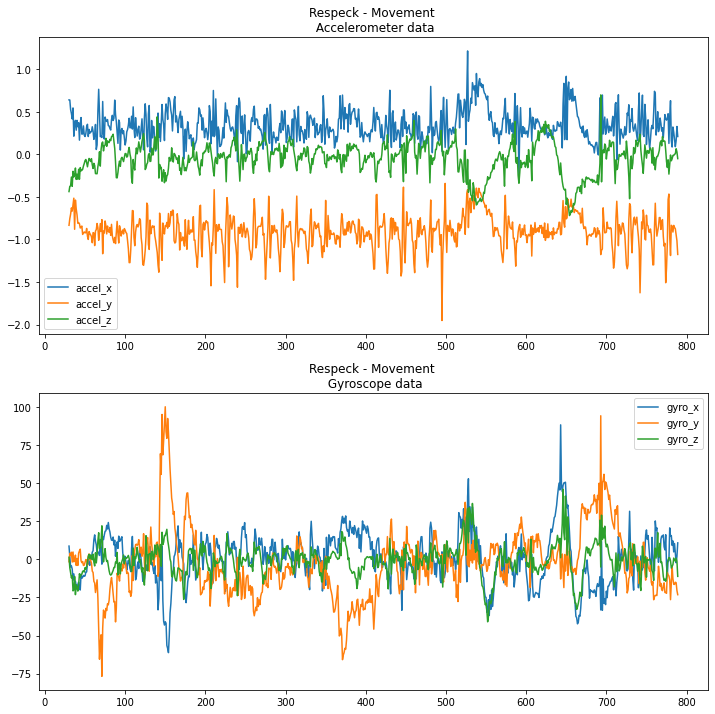

In [112]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# plot respeck
ax[0].plot(df_respeck['accel_x'], label="accel_x")
ax[0].plot(df_respeck['accel_y'], label="accel_y")
ax[0].plot(df_respeck['accel_z'], label="accel_z")
ax[0].legend()

ax[0].set_title(f"{df_respeck['sensor_type'].values[0]} - {df_respeck['activity_type'].values[0]} \n Accelerometer data")

ax[1].plot(df_respeck['gyro_x'], label="gyro_x")
ax[1].plot(df_respeck['gyro_y'], label="gyro_y")
ax[1].plot(df_respeck['gyro_z'], label="gyro_z")
ax[1].legend()

ax[1].set_title(f"{df_respeck['sensor_type'].values[0]} - {df_respeck['activity_type'].values[0]} \n Gyroscope data")

Text(0.5, 1.0, 'Thingy - Movement \n Magnetometer data')

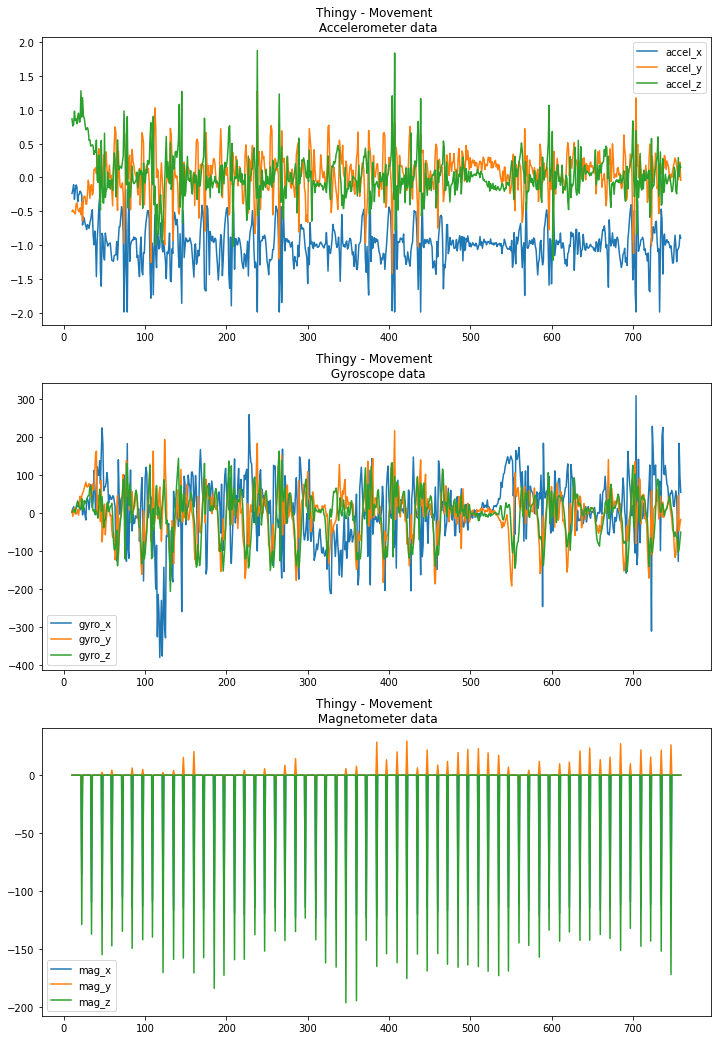

In [113]:
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# plot thingy
ax[0].plot(df_thingy['accel_x'], label="accel_x")
ax[0].plot(df_thingy['accel_y'], label="accel_y")
ax[0].plot(df_thingy['accel_z'], label="accel_z")
ax[0].legend()

ax[0].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Accelerometer data")

ax[1].plot(df_thingy['gyro_x'], label="gyro_x")
ax[1].plot(df_thingy['gyro_y'], label="gyro_y")
ax[1].plot(df_thingy['gyro_z'], label="gyro_z")
ax[1].legend()

ax[1].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Gyroscope data")

ax[2].plot(df_thingy['mag_x'], label="mag_x")
ax[2].plot(df_thingy['mag_y'], label="mag_y")
ax[2].plot(df_thingy['mag_z'], label="mag_z")
ax[2].legend()

ax[2].set_title(f"{df_thingy['sensor_type'].values[0]} - {df_thingy['activity_type'].values[0]} \n Magnetometer data")

# Trim the data

In [106]:
df_respeck = df_respeck[30:790]

In [107]:
len(df_respeck)

760

In [108]:
df_thingy = df_thingy[10:760]

In [109]:
len(df_thingy)

750

## Check length

In [110]:
len(df_thingy) / get_frequency(df_thingy)

29.947

In [111]:
len(df_respeck) / get_frequency(df_respeck)

29.957

# Save Cleaned Data

In [114]:
rec_name = df_respeck.recording_id.values[0]
print(rec_name)

df_respeck.to_csv(f"./Data/Clean/{rec_name}.csv", index=False)

Respeck_s1918275_Movement_01-10-2022_14-11-39


In [115]:
rec_name = df_thingy.recording_id.values[0]
print(rec_name)

df_thingy.to_csv(f"./Data/Clean/{rec_name}.csv", index=False)

Thingy_s1918275_Movement_01-10-2022_14-10-59
